# Loading & Exploring Geo-Data with Geopandas

Work out how to load the London LSOA shapefile (`LDN-LSOAs.shp`) into a geopandas data frame object called `lsoa` by looking at the geopandas documentation: http://geopandas.org/user.html#geodataframe. I'll give you a few clues to get your started:

In [21]:
import os
import fiona
import shapely 
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import pysal as ps
from pysal.contrib.viz import mapping as maps

%matplotlib inline

lsoa = gpd.read_file(os.path.join('shapes','LDN-LSOAs.shp'))

print("Class type: " + str(type(lsoa)))

Class type: <class 'geopandas.geodataframe.GeoDataFrame'>


Make a note of the other methods in the GeoDataFrame section, you might need one or two of them later.

## A (Brief) Discourse on Family & Inheritance

Geopandas objects are deliberately designed to resemble pandas objects. There are two reasons for this: 

1. Since pandas is well-known, this makes it easier to learn how to use geopandas.
2. Geopandas _inherits_ functionality from Pandas. 

The concept of **inheritance** is something we've held off from mentioning for a while, but it's definitely worth understanding if you are serious about learning how to code. In effect, geopandas _imports_ pandas and then _extends_ it so that it learns how to work with geo-data... pandas doesn't know how to read shapefiles, but geopandas does. Same for GeoJSON.

Here's a simple way to think about inheritance: think of the 'tree of life' you've seen charting the evolution of organisms in terms of complexity. At the bottom of the tree is the single-celled animal, and at the other end are humans, whales, wildebeest, etc. We all _inherit_ some basic functionality from that simple cell. In between us and that primitive animal, however, are a series of branches: different bits of the tree evolved different functionality. Some of us have bones. Some cartilege. Some have exoskeletons. Some are vegetarian, and others carnivorous. And so on. When you get to the primates we all share certain 'features', but we are _still_ more similar to gorillas than we are to macaques. Gorillas and humans _extend_ the primitive 'primate functionality' with some bonus features (bigger brains, greater strength, etc.) that are useful.

Inheritance in code works in a similar way: *all* Python classes (lists, pandas, plots, etc.) inherit from a single primitive 'object' class that itself does very little except to provide a template for what an object looks like. As you move down through the inheritance tree you find more and more complex objects with increasingly advanced features: Bokeh and Seaborn inherit from matplotlib so that they can build on top of it, but you can, if necessary, always access the underlying matplotlib features. In the same way, geopandas inherits from pandas, but if you need to use a geopandas object _as if_ it's a pandas object that will work! So everything you learned last term can still be used in geopandas. Kind of cool, right?

Let's see this in action:

In [23]:
print("Polymorphism in classes: ")
print('I\'m a geopandas data frame: ' + str(isinstance(lsoa, gpd.GeoDataFrame)))
print('I\'m also a pandas data frame: ' + str(isinstance(lsoa, pd.DataFrame)))
print("-" * 50)

print("Using the 'head()' method: ")
print(lsoa.head(3))
print("-" * 50)

print("What the LSOA11CD column type: ")
print('LSOA11CD type: ' + str(type(lsoa.LSOA11CD)))
print("-" * 50)

print("Describe the column: ")
print(lsoa.LSOA11CD.describe())
print("-" * 50)

print("What's the geometry column type: ")
print('Geometry type: ' + str(type(lsoa.geometry)))
print("-" * 50)

# The next line is very slow, don't run it:
# print(lsoa.geometry.describe())
# print("-" * 50)

print("Is there a CRS column: ")
print('CRS: ' + str(lsoa.crs))
print("-" * 50)

Polymorphism in classes: 
I'm a geopandas data frame: True
I'm also a pandas data frame: True
--------------------------------------------------
Using the 'head()' method: 
    LSOA11CD             LSOA11NM            LSOA11NMW  \
0  E01000001  City of London 001A  City of London 001A   
1  E01000002  City of London 001B  City of London 001B   
2  E01000003  City of London 001C  City of London 001C   

                                            geometry  
0  POLYGON ((532105.0919998939 182011.23, 532162....  
1  POLYGON ((532746.8130000263 181786.891000028, ...  
2  POLYGON ((532135.1449999654 182198.1190000199,...  
--------------------------------------------------
What the LSOA11CD column type: 
LSOA11CD type: <class 'pandas.core.series.Series'>
--------------------------------------------------
Describe the column: 
count          4835
unique         4835
top       E01004035
freq              1
Name: LSOA11CD, dtype: object
--------------------------------------------------
What's

### Some questions for you:

1.	What type of data structure is the CRS attribute of the geopandas data frame?
2.	How would you confirm this?
3.  How would you print out the datum?
4.	What is the data structure of the geometry column (broadly)?
5.	Are there any differences between what a similar pandas data frame would give you if you ran any of the non-geographic commands?

Create a plot in geopandas – let’s take the most basic approach first (you will need to be patient):

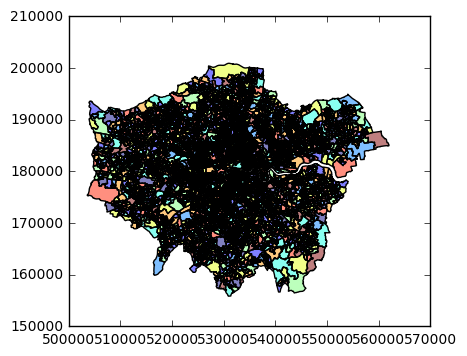

In [24]:
lsoa.plot()

Improving rendering speed?

In [27]:
lsoa2 = lsoa.simplify(250)

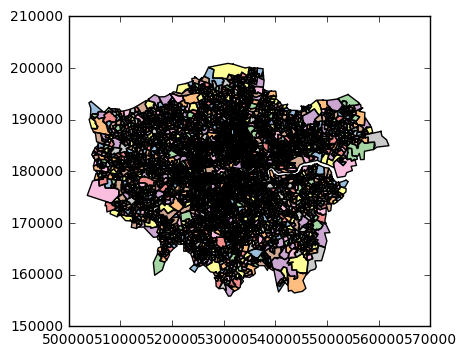

In [28]:
lsoa2.plot()

Let’s try to improve the output a bit: take a look at the code and see if you can figure out how to make the figure **title** appear at the top-left of the figure in an 18pt font-size instead of the default position (which is centred and 12pt). You need to think both about alignment and the actual position of the title in x/y space. If you need a little `help()`, why not use the empty coding block below the plot?

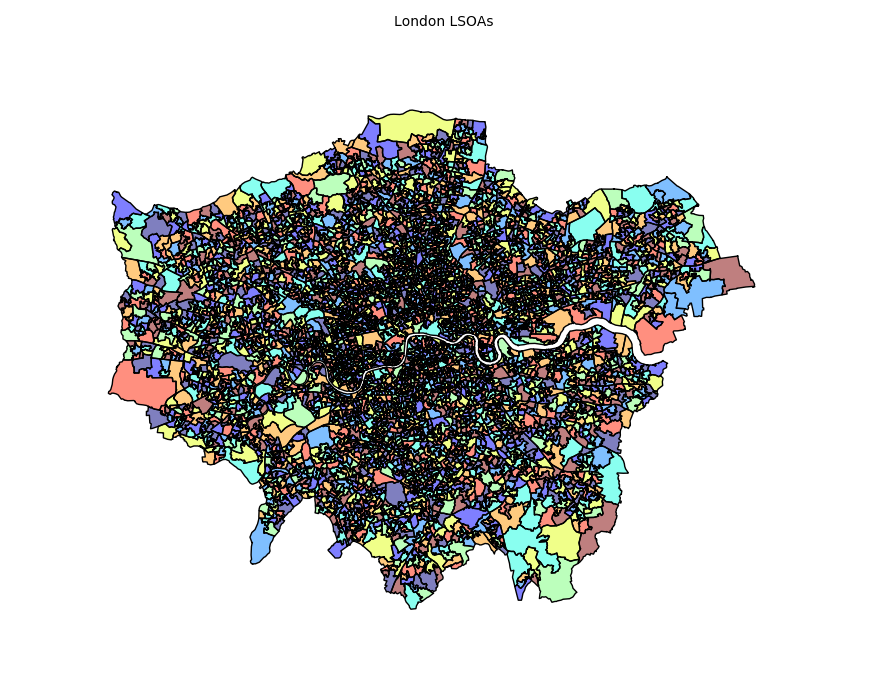

In [30]:
f, axes = plt.subplots(1, figsize=(10, 7))
axes = lsoa.plot(ax=axes, alpha=0.5)
axes.set_axis_off()
lims = plt.axis('equal')
f.suptitle('London LSOAs')
plt.show()

In [31]:
help(f.suptitle)

Help on method suptitle in module matplotlib.figure:

suptitle(self, t, **kwargs) method of matplotlib.figure.Figure instance
    Add a centered title to the figure.
    
    kwargs are :class:`matplotlib.text.Text` properties.  Using figure
    coordinates, the defaults are:
    
      *x* : 0.5
        The x location of the text in figure coords
    
      *y* : 0.98
        The y location of the text in figure coords
    
      *horizontalalignment* : 'center'
        The horizontal alignment of the text
    
      *verticalalignment* : 'top'
        The vertical alignment of the text
    
    A :class:`matplotlib.text.Text` instance is returned.
    
    Example::
    
      fig.suptitle('this is the figure title', fontsize=12)



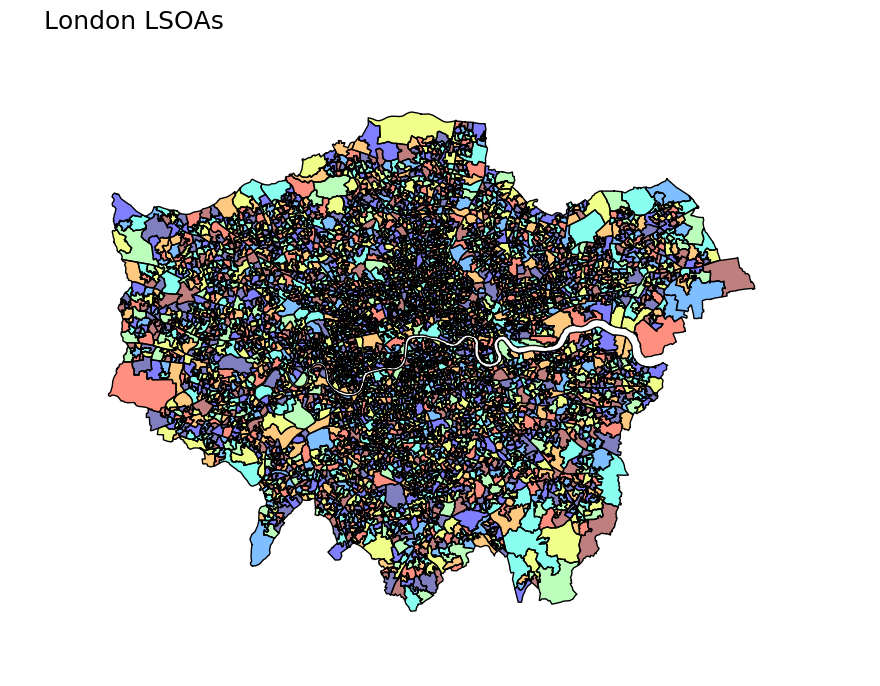

In [34]:
f, axes = plt.subplots(1, figsize=(10, 7))
axes = lsoa.plot(ax=axes, alpha=0.5)
axes.set_axis_off()
lims = plt.axis('equal')
f.suptitle('London LSOAs', x=0.1, y=0.99, horizontalalignment='left', verticalalignment='top', fontsize=18)
plt.show()

This random colour scheme is a little hard on the eyes, so let’s improve how things are rendered in the maps. What could you put in place of the '???'s of for the for loop in order to improve the look of the map?

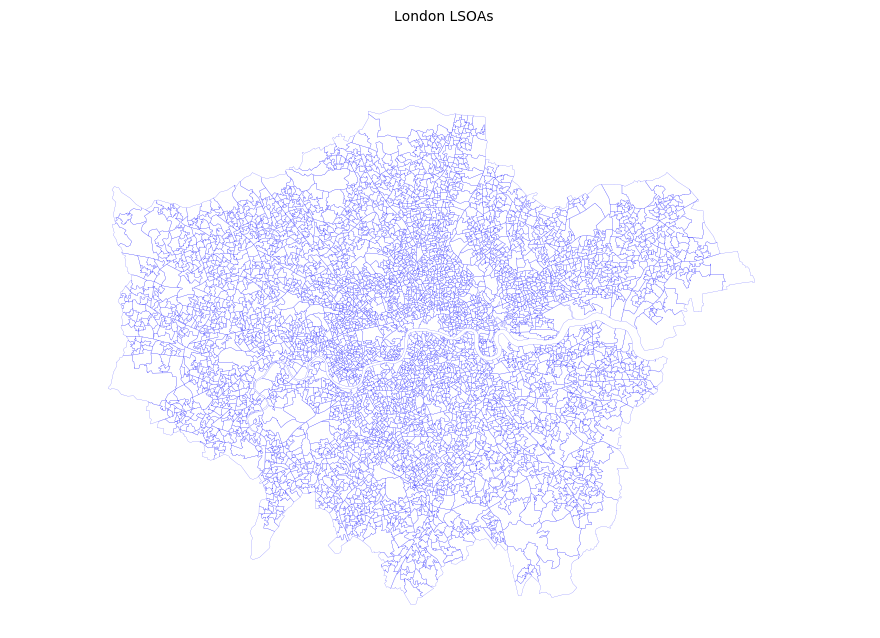

In [37]:
f, ax = plt.subplots(1, figsize=(10, 7))
for p in lsoa['geometry'].simplify(50):
    gpd.plotting.plot_multipolygon(ax, p, edgecolor='blue', linewidth=0.1, 
                                   facecolor='white', alpha=0.25)
ax.set_axis_off()
lims = plt.axis('equal')
f.suptitle('London LSOAs')
plt.show()

Note that we can also see how to save the output as a PDF; note that it’s the same code as we used with pandas!

In [38]:
f.savefig('map1.pdf', format='pdf')
print("Done.")

Done.


# Linking Geo-Data on Keys

Last week you did one type of `join` in Folium. This week we're going to do much more powerful joins using pandas. First, it's good practice that you remember how to load the NS-SeC data that we used last term into a pandas data frame called `df`.

Now have a look at the code below. Do you see that we are using the `pandas` merge function create a new data frame called `shapedf` from the combination of the pandas and geopandas data frames. That's only possible because geopandas extends pandas and so knows how to 'answer' the merge request.

In [ ]:
shpdf = pd.merge(lsoa, df, left_on='LSOA11CD', right_on='GEO_CODE', how='left')

### Some Questions

1. Why do you think that we have `left_on` and `right_on` parameters? *[We’ll get into the ‘how’ option later in the term.]*
2. How would you confirm that the merge had been successful?
3. Why might we then want to run: `del df, lsoa`.

## Choropleth Mapping

In this section we’ll spend more time investigating the options that can be passed to the `plot()` command of `geopandas`. In this case it turns out that the documentation is pretty poor (`help(gpd.GeoDataFrame.plot)`) and doesn’t really give you much help; however, by searching online using Google and StackOverflow you’ll be able to figure out the missing options where there are only ?'s now.

In [ ]:
f, ax = plt.subplots(1, figsize=(10, 7))
shpdf.plot(column=???, scheme='Quantiles', k=???, 
           colormap=???, edgecolor=???, linewidth=0.1, axes=ax, alpha=1.0)
f.suptitle('London LSOAs')
plt.tight_layout()
plt.show()
f.savefig(os.path.join('maps', "map2" + ".pdf"), format='pdf')
plt.close(f)
print("Done.")

Let’s improve the plot a bit more by giving it a legend and by turning off the box & x/y-axis labels which don’t really add much to our visualisation.
* You’ll need to figure out what to pass to the `legend=` parameter to get an automatic legend of some sort.
* You will also have to replace the ??? on its own ith a command that turns the axis off; try `help(ax)` and then look for something about axes, or use Google to look for something like "`turn axes off in matplotlib python`".

In [ ]:
f, ax = plt.subplots(1, figsize=(10, 7))
shpdf.plot(column='Group1', scheme='Quantiles', k=9, 
           colormap=???, edgecolor=???, linewidth=0.1, axes=ax, 
           alpha=1.0, legend=???)
f.suptitle('London LSOAs')
???
f.savefig(os.path.join('maps', "map3" + ".pdf"), format='pdf')
plt.close(f)
print("Done.")

## Writing GeoJSON

To generate a GeoJSON file (like the one we used with Folium last week) from geopandas is quite straightforward... once you know the steps to take.

The first thing we need to do is reproject the data frame into the correct CRS/Projection. If you look around online then you will find that there is one very commonly used projection for interactive web maps? That’s the number missing from the `???`.

In [ ]:
gjson = lsoa.to_crs(epsg=???)

After that, we need to write the new GeoJSON file to disk. Which object is writing out the json and marked by the `???`? Do you think it’s `gjson` or `lsoa`?

In [ ]:
with open(os.path.join(outdir,'lsoa.geojson'),'w') as f:
    f.write(???.to_json())

## Simplifying Geometries

Although Folium can do this as well, and you get finer control over the ways in which shapes (lines and polygons) are simplified in a full GIS,  a quick-and-dirty version is provided by geopandas. 

In [ ]:
test = lsoa.simplify(???)
test.plot()

Try picking a couple of different values to pass to `simplify` and see what you get. You can also try searching on "`geopandas convex hull`" for a more dramatic effect.

And can you figure out what goes in place of the `???` below in order to get it convert all of the LSOAs to centroids?

In [ ]:
test.???.plot()
del test

## Computational approaches

Please take a look at how the code below is written. This is a good 'reference implementation' to help you to understand how you can use code to output not just one map, but many.

In [ ]:
# Create and save PDF maps for each.
# Use a for loop and avoid any hard-coding of parameters that 
# relate to the data itself. In other words, by changing _one_ line
# you could easily do the same for groups 3 & 9 if asked.
# (The format of the plot [e.g. colour scheme, linewidth, etc.] _can_ 
# be hard-coded, but not its output file name and such).
for g in ['Group1','Group8']:
    # Convert the data types to float otherwise
    # all operations happen as ints
    shpdf[[g, 'Total']] = shpdf[[g, 'Total']].astype(float)
    
    # Calculate the LQ in one go
    shpdf[g+'Pct'] = shpdf[g]/shpdf.Total
    
    f, ax = plt.subplots(1, figsize=(10, 7))
    shpdf.plot(column=g+'Pct', scheme='Quantiles', k=9, colormap='YlOrRd', edgecolor='white', linewidth=0.1, axes=ax, alpha=1.0, legend=True)
    f.suptitle('Proportional Concetration of ' + g)
    ax.set_axis_off()
    f.savefig(os.path.join(outdir, g + "Pct" + ".pdf"), format='pdf')
    plt.close(f)

print("Done.")

Now let's do the same for the LQ:

In [ ]:
# Use a for loop and avoid any hard-coding of parameters that 
# relate to the data itself. In other words, by changing _one_ line
# you could easily do the same for groups 3 & 9 if asked.
# (The format of the plot [e.g. colour scheme, linewidth, etc.] _can_ 
# be hard-coded, but not its output file name and such).
for g in ['Group1','Group8']:
    # Convert the data types to float otherwise
    # all operations happen as ints
    shpdf[[g, 'Total']] = shpdf[[g, 'Total']].astype(float)
    
    # Calculate the LQ in one go (you saw this last term!)
    shpdf[g+'LQ'] = ???
    
    f, ax = plt.subplots(1, figsize=(10, 7))
    shpdf.plot(column=g+'LQ', scheme='Quantiles', k=9, colormap='YlOrRd', edgecolor='white', linewidth=0.1, axes=ax, alpha=1.0, legend=True)
    f.suptitle('Location Quotient of ' + g)
    ax.set_axis_off()
    f.savefig(os.path.join(outdir, g + "LQ" + ".pdf"), format='pdf')
    plt.close(f)
    del f, ax

print("Done.")

### Bonus Questions 

If you have made it through the rest of the notebook, why not try to make more sense of the data as follows:

1. Use Seaborne to produce a histogram of the LQ indexes. Is this distribution compatible with using the mean and SD as ways to 'cut' the data?
3. Try log-transforming Group 1 and then use Seaborne to generate another histogram. Does this one conform better to the assumptions of the normal distribution?
3. Using whichever of the two distributions more closely fits a normal distribution, calculate the Standard Deviation from the mean for that series. Did you manage to do this in one line of code?
4. What do you think is an appropriate cut-off for specifying that a Group 1 LQ is _significantly_ greater than the mean? 1 SD? 1.95 SDs? ... _something else_?
5. Using the chosen cut-off, create a new categorical variable called `High_Group1_LQ` whose value is `Yes` if the LQ (or logged LQ) for that area is significantly greater than the mean and `No` otherwise. Try creating a map using this column, but note that you'll have to add the parameter: `categorical=True`.
6. See if you can figure out how to zoom the map to cover only Inner London by setting the y-limits and x-limits (you'll need to Google for these).

# Geocoding New Data with QGIS

Launch QGIS. You should running version 2.14.

## Using a Background Map

Before we get started, it's useful to add a generic background map... a lot like we did with folium where we specified the tile type:
* With QGIS is in the foreground, select `Manage and Install Plugins` from the drop-down menu at the top of the GeoCUP window.
* Search for `QuickMapServices` and click `Install`.
* Close the Plugin Manager.

You should now have a new option under the Web menu item at the top of the GeoCUP window:
* Add ‘OpenStreetMap’ and you should see (possibly after a short wait) a view of the world in Pseudo Mercator appear.
* Click on the projection label at the bottom of QGIS.
* Make sure that you enable 'on the fly' CRS transformation.
* Filter for the projection numbered 27700 and select the appropriate British National Grid coordinate reference system before clicking ‘Apply’.

**Question**: How does the world map shown from the OpenLayers plug-in change?

Now:
* Try manually setting the centre of the map by typing 0,0 into the coordinates area at the bottom of the window. Does this view look a little more 'normal'? 
* Try using the zoom and pan functions to re-centre the map on Greater London (see below).

## Creating and populating a new shapefile

We’re now going to create a new shapefile and populate it with the locations of London’s biggest airports: Heathrow, Stansted, Luton, City, Southend, and Gatwick.

To create a new shapefile we need to know that in QGIS' terminology it’s called a layer, so you're looking for `Layer > Create Layer > New Shapfile...`
 
QGIS will then ask us to provide some information about our new shapefile layer:
* We will specify the type as point (at this scale, airports are points).
* We will specify a CRS using the EPSG format appropriate for the UK.
* We have already created one new attribute called `name` by filling in the `New attribute` section and then clicking `Add to attributes list`.
* This new attribute now exists in the ‘Attributes list’ section.

In order to start editing the content in our new, empty shapefile we need to turn on the editing function – this is a lot easier than in ArcGIS since it’s as simple as pressing the 'pencil' button (with the layer that you want to edit selected) and seeing that a pencil now exists next to your layer name to indicate that you can make edits.
 
If you let your mouse linger over the editing buttons then you’ll see that they enable you to ‘save your edits’, ‘add new points’, ‘modify points’, and so on. The rubbish bin will delete a point.
 
If you then click anywhere in the map window you’ll be asked to enter values for the attributes that you set up when you first created the shapefile.
 
When you are done adding airports, you simply click the ‘pencil’ button again and you will be asked to save your changes. Click ‘yes’ and your shapefile is up-to-date... and ready to read into geopandas!

### Loading the new Shapefile
Reading in the new data is as easy as fixing the missing ???. Clearly, this is going to be the path to the shapefile that you just created.

In [ ]:
airports = gpd.GeoDataFrame.from_file(os.path.join(???))

## Deriving geographical summary data

To derive the mean distance between airports, we need to calculate the distance between each pair, but we only want to do this once for each pair so it’s a combinatorial problem. Fortunately, Python has a library to do this for us: try Googling for 'how to get unique combinations of a list in Python'... you will want to import one function from one library to make this work.

In [ ]:
from ??? import ???

If we want to find the distance between a pair of coordinates in geopandas then we need to loop over each pair and select them from the data frame. Given what we have in `p`, what do you think needs to replace the ??? in the calculations? 

In [ ]:
distances = []

for p in combinations(range(0, airports.shape[0]), 2):
    # Sanity check
    print(p)
    # We need to see how to find the distance between points by  
    # looking at the documentation: http://geopandas.org/user.html
    print(airports.ix[???].geometry.distance(airports.ix[???].geometry))
    distances.append(
        airports.ix[???].geometry.distance(airports.ix[???].geometry)
    )

d = np.array(distances)
print("The mean distance between airports in London is " + str(d.mean()))

*Hint*: if you are struggling with what’s happening here, why not try breaking this for loop down into something a little simpler: 
1. Print out what’s in `p`, 
2. Then try accessing the elements of `p`,
3. Then printing out the results of the calculation before actually appending to distances.

Notice what we do by converting a simple list to a `numpy` array: we become able to perform various mathematical functions on the list quickly and easily. One of those functions is to calculate the mean distance.

To work out the spatial mean of London’s airports you’ll need to do some more Googling: my suggestion would be something like "`access coordinates of point geopandas`". The answer, in this case, is probably on github.

In [ ]:
x = airports.geometry.apply(???)
y = airports.geometry.apply(???)

print("The spatial mean of London's airports is: " + str(x.mean()) + ", " + str(y.mean()))
print("The standard deviation in each direction is: " + str(x.std()) + ", " + str(y.std()))
print("The standard distance is: " + ???) # Hint: this is a distance question...